In [13]:
from __future__ import division
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
import tensorflow as tf

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
import tensorflow as tf
import itertools
import seaborn as sns
from pylab import rcParams
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import seaborn as sns
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log_adult.csv', append=True, separator=';')

from keras.models import Model, load_model,Sequential
from keras.layers import Input, Dense,Dropout,Activation
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.svm import OneClassSVM


from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


# load data
df_train = pd.read_csv('train.csv')
#df_test = pd.read_csv('../input/test.csv')

# remove constant columns
remove = []
for col in df_train.columns:
    if df_train[col].std() == 0:
        remove.append(col)

df_train.drop(remove, axis=1, inplace=True)
#df_test.drop(remove, axis=1, inplace=True)

# remove duplicated columns
remove = []
c = df_train.columns
for i in range(len(c)-1):
    v = df_train[c[i]].values
    for j in range(i+1,len(c)):
        if np.array_equal(v,df_train[c[j]].values):
            remove.append(c[j])

df_train.drop(remove, axis=1, inplace=True)
#df_test.drop(remove, axis=1, inplace=True)


scaler = MinMaxScaler()

df_mm = scaler.fit_transform(df_train)

df1_scaled = pd.DataFrame(df_mm, columns=df_train.columns)



y = df1_scaled['TARGET'].values
X = df1_scaled.drop(['ID','TARGET'], axis=1).values


    
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X, y.ravel())
X_train_res = pd.DataFrame(X_train_res)
y_train_res = pd.DataFrame(y_train_res)
y_train_res.columns = ['Income']
    #print(y_train_res)
print("After SMOTE",y_train_res.Income.value_counts())

new_df = pd.concat([X_train_res, y_train_res], axis=1, sort=False)
new_df



X_train, X_test, y_train, y_test= train_test_split(X_train_res, y_train_res, test_size=0.25)


# classifier
clf = xgb.XGBClassifier(missing=np.nan, max_depth=5, n_estimators=350, learning_rate=0.03, nthread=4, subsample=0.95, colsample_bytree=0.85, seed=4242)

X_fit, X_eval, y_fit, y_eval= train_test_split(X_train, y_train, test_size=0.1)

# fitting
clf.fit(X_fit, y_fit, early_stopping_rounds=20, eval_metric="auc", eval_set=[(X_eval, y_eval)])

print('Overall AUC:', roc_auc_score(y_train, clf.predict_proba(X_train)[:,1]))

# predicting
y_pred= clf.predict_proba(X_test)[:,1]


#submission = pd.DataFrame({"ID":id_test, "TARGET":y_pred})
#submission.to_csv("submission.csv", index=False)

print('Completed!')

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


After SMOTE 1.0    73012
0.0    73012
Name: Income, dtype: int64


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.827879
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.874691
[2]	validation_0-auc:0.872307
[3]	validation_0-auc:0.882187
[4]	validation_0-auc:0.8901
[5]	validation_0-auc:0.890998
[6]	validation_0-auc:0.890737
[7]	validation_0-auc:0.894592
[8]	validation_0-auc:0.895027
[9]	validation_0-auc:0.894688
[10]	validation_0-auc:0.893884
[11]	validation_0-auc:0.893631
[12]	validation_0-auc:0.895673
[13]	validation_0-auc:0.895397
[14]	validation_0-auc:0.895698
[15]	validation_0-auc:0.895537
[16]	validation_0-auc:0.89596
[17]	validation_0-auc:0.89721
[18]	validation_0-auc:0.89721
[19]	validation_0-auc:0.897854
[20]	validation_0-auc:0.897766
[21]	validation_0-auc:0.897413
[22]	validation_0-auc:0.898709
[23]	validation_0-auc:0.898684
[24]	validation_0-auc:0.899131
[25]	validation_0-auc:0.899675
[26]	validation_0-auc:0.899703
[27]	validation_0-auc:0.900044
[28]	validation_0-auc:0.900057
[29]	validation_0-auc:0.902292
[30]	validation_0-auc

In [15]:
y_pred
pred = y_pred
#print(pred)
pred[pred > 0.5 ] = 1
pred[pred <= 0.5] = 0
#print(pred)
print(accuracy_score(y_test,pred)*100)

89.05111488522435


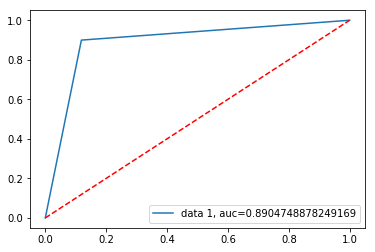

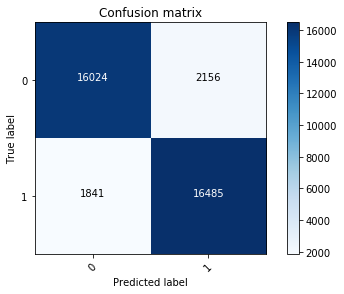

Accuracy: 89.05111488522435%
              precision    recall  f1-score   support

         0.0       0.90      0.88      0.89     18180
         1.0       0.88      0.90      0.89     18326

   micro avg       0.89      0.89      0.89     36506
   macro avg       0.89      0.89      0.89     36506
weighted avg       0.89      0.89      0.89     36506



In [16]:
from sklearn import metrics

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


pred = y_pred
pred[pred > 0.5] =1
pred[pred<=0.5] = 0
fpr,tpr,the= metrics.roc_curve(y_test,pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.legend(loc=4)
plt.show()
cnf_matrix = confusion_matrix(y_test, pred)
dict_characters = {0: 'Malignant', 1: 'Benign'}
plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
plt.show()
print("Accuracy: %s%%" % (100*metrics.accuracy_score(y_test, pred)))
print(metrics.classification_report(y_test, pred))

In [17]:
new_df.columns  = df_train.drop(['ID'],axis=1).columns
new_df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001545,0.0
1,0.999764,0.29,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002003,0.0
2,0.999764,0.18,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002822,0.0
3,0.999764,0.32,0.0,0.01513,0.009275,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002671,0.0
4,0.999764,0.34,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091,0.0


In [0]:
### Modelling with Autoencoder and Neural Network

In [0]:
def seperate_data(df1):
    
    return X,y

def traintest_split(df1):
   # X=df1.iloc[:,0:-1]
  #  y=df1.iloc[:,-1]
#    print(X.head())
#    print(y.head())
    Y = df1['TARGET']
    X = df1.drop(['TARGET'], axis=1)

    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,shuffle=False)
    print(x_train.shape)
    print(x_test.shape)
 #   print(y_train.shape)
 #   sm = SMOTE(random_state=2)
 #   X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())
 #   X_train_res = pd.DataFrame(X_train_res)
 #   y_train_res = pd.DataFrame(y_train_res)
 #   y_train_res.columns = ['Income']
    #print(y_train_res)
 #   print("After SMOTE",y_train_res.Income.value_counts())
    return x_train,x_test,y_train,y_test
  
  

  
  
def autoencoder(x_train, x_test, epoch = 10, batch = 32):
    
    encoder_acc_df = pd.DataFrame()
    input_dim = x_train.shape[1]
    encoding_dim = 300

    input_layer = Input(shape=(input_dim, ))
    encoder = Dense(encoding_dim, activation="relu", 
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
    encoder = Dense(int(encoding_dim / 1.5), activation="relu")(encoder)
    encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)
    #decoder = Dense(int(encoding_dim / 2), activation="relu")(encoder3)
    decoder = Dense(int(encoding_dim / 1.5), activation='relu')(encoder)
    decoder = Dense(encoding_dim, activation='relu')(decoder)
    decoder = Dense(input_dim, activation='sigmoid')(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)


    nb_epoch = epoch
    batch_size = batch
    print('\x1b[1;32m'+"\nAuto encoder Training\n" +'\x1b[0m')
    autoencoder.compile(optimizer='adam', 
                    loss='mean_squared_error')

    history = autoencoder.fit(x_train, x_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=2,
                    callbacks=[csv_logger]).history
    encoder = Model(input_layer, encoder)
    encoded_input = Input(shape = (encoding_dim, ))

    encoded_train_x = encoder.predict(x_train)
    encoded_test_x = encoder.predict(x_test)
    
    temp = pd.DataFrame()

    L  = []
    for x in range(nb_epoch):
       L.append((str(input_dim) + ',' + str(encoding_dim) + ',' + str(encoding_dim/1.5) +  ',' + str(int(encoding_dim / 2)) + ',' + str(encoding_dim/1.5) + ',' + str(encoding_dim) + ',' + str(input_dim)))

    epoch_list  = []
    for x in range(1,nb_epoch+1):
        epoch_list.append(x)

    temp['Layer'] = pd.Series(L)
    temp['epoch'] = pd.Series(epoch_list).astype('str')

    temp['Loss']= history['loss']  
    temp['Val_Loss'] = history['val_loss']
    
    return encoded_train_x,encoded_test_x,temp
   
  

In [0]:
 
def stacked_model(encoded_train_x  , y_train, epochs =10, batch = 64):
    temp2 = pd.DataFrame()
    nb_epoch = epochs
    model = Sequential()
    model.add(Dense(30, input_dim=encoded_train_x.shape[1],
                kernel_initializer='normal',
                #kernel_regularizer=regularizers.l2(0.02),
                activation="relu"
                )
          )
    model.add(Dropout(0.2))
    model.add(Dense(30,   activation="relu" ) )
    model.add(Dropout(0.2))
    model.add(Dense(30,   activation="relu" ) )
    model.add(Dropout(0.2))
    model.add(Dense(10,   activation="relu" ) )
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.add(Activation("sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer='adam', 
                    metrics=['accuracy'])
    print('\x1b[1;32m'+"\nModel Summary\n" +'\x1b[0m')
    print(model.summary())
    print('\x1b[1;32m'+"\nStacked Autoencoder Training\n" +'\x1b[0m')
    stacked_history = model.fit(encoded_train_x  , y_train, validation_split =0.2 , epochs = epochs , verbose =2,batch_size = batch ,callbacks=[CSVLogger('fit.log')])
    
    L  = []
    for x in range(nb_epoch):
       L.append((str(encoded_train_x.shape[1]) + ',' + '16' +  ',' + '1'))

    epoch_list  = []
    for x in range(1,nb_epoch+1):
        epoch_list.append(x)
    temp2['Layer'] = pd.Series(L)
    temp2['epoch'] = pd.Series(epoch_list).astype('str')
    temp2['Acc'] = stacked_history.history['acc']
    temp2['Val_Acc'] = stacked_history.history['val_acc']
    temp2['Loss'] = stacked_history.history['loss']  
    temp2['Val_Loss'] = stacked_history.history['val_loss']
    return stacked_history, model,temp2
  
def predict(encoded_test_x, stacked_model):
    pred = stacked_model.predict(encoded_test_x)
    pred_prob = pred
    pred[pred > 0.5 ] = 1
    pred[pred <= 0.5] = 0
    return pred_prob, pred
  
  
  
  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

dict_characters = {0: 'Malignant', 1: 'Benign'}

def ROC_plot(pred_prob, pred,y_test):
    temp3 = pd.DataFrame()
    print("\n")
   # ax1 = plt.subplot(221)
    fpr,tpr,the= metrics.roc_curve(y_test,pred)
    auc = metrics.roc_auc_score(y_test, pred_prob)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.plot([0, 1], [0, 1],'r--')
    plt.legend(loc=4)
    plt.show()
    print("\n")
   # ax2 = plt.subplot(222)
    cnf_matrix = confusion_matrix(y_test, pred)
    dict_characters = {0: 'Malignant', 1: 'Benign'}
    plot_confusion_matrix(cnf_matrix, classes=dict_characters,title='Confusion matrix')
    plt.show()
    print("\n")
    print('\x1b[1;32m'+ "Accuracy: %s%%" % round(100*metrics.accuracy_score(y_test, pred),2)+'\x1b[0m')
    print("\n")
    print(metrics.classification_report(y_test, pred))
    
    #print(metrics.accuracy_score(y_test, pred))
    temp3['Accuracy'] = pd.Series(round(metrics.accuracy_score(y_test, pred),2))
    temp3['AUC'] = pd.Series(round(metrics.roc_auc_score(y_test, pred),2))
    temp3['F1 Score'] = pd.Series(round(metrics.f1_score(y_test, pred, average='weighted')  ,2))
    temp3['Recall'] = pd.Series(round(metrics.recall_score(y_test, pred, average='weighted') ,2))
    temp3['Precision'] = pd.Series(round(metrics.precision_score(y_test, pred, average='weighted') ,2))
    #print(temp3)
    roc_model = pd.concat([pd.DataFrame(fpr), pd.DataFrame(tpr)], axis =1)
    return temp3,roc_model 

SAMPLE SIZE- 20.0 %

(19567, 306)
(9638, 306)
train.shape (19567, 306)

Auto encoder Training

Train on 19567 samples, validate on 9638 samples
Epoch 1/20
 - 61s - loss: 0.0033 - val_loss: 0.0022
Epoch 2/20
 - 52s - loss: 0.0015 - val_loss: 0.0017
Epoch 3/20
 - 50s - loss: 0.0012 - val_loss: 0.0012
Epoch 4/20
 - 51s - loss: 0.0011 - val_loss: 0.0011
Epoch 5/20
 - 51s - loss: 0.0010 - val_loss: 9.6290e-04
Epoch 6/20
 - 47s - loss: 9.4150e-04 - val_loss: 8.9615e-04
Epoch 7/20
 - 39s - loss: 9.2831e-04 - val_loss: 0.0012
Epoch 8/20
 - 52s - loss: 9.0127e-04 - val_loss: 9.1587e-04
Epoch 9/20
 - 52s - loss: 8.7841e-04 - val_loss: 8.8836e-04
Epoch 10/20
 - 51s - loss: 8.6539e-04 - val_loss: 9.3805e-04
Epoch 11/20
 - 51s - loss: 8.5223e-04 - val_loss: 0.0010
Epoch 12/20
 - 51s - loss: 8.3462e-04 - val_loss: 9.0919e-04
Epoch 13/20
 - 52s - loss: 8.0665e-04 - val_loss: 8.6278e-04
Epoch 14/20
 - 52s - loss: 8.1149e-04 - val_loss: 8.1877e-04
Epoch 15/20
 - 36s - loss: 7.7224e-04 - val_loss: 7.876

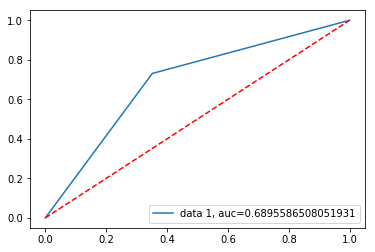

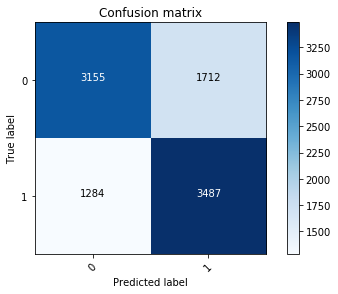



Accuracy: 68.91%


              precision    recall  f1-score   support

         0.0       0.71      0.65      0.68      4867
         1.0       0.67      0.73      0.70      4771

   micro avg       0.69      0.69      0.69      9638
   macro avg       0.69      0.69      0.69      9638
weighted avg       0.69      0.69      0.69      9638


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 40.0 %

(39134, 306)
(19276, 306)
train.shape (39134, 306)

Auto encoder Training

Train on 39134 samples, validate on 19276 samples
Epoch 1/20
 - 64s - loss: 0.0026 - val_loss: 0.0013
Epoch 2/20
 - 61s - loss: 0.0011 - val_loss: 0.0012
Epoch 3/20
 - 72s - loss: 9.1119e-04 - val_loss: 0.0010
Epoch 4/20
 - 101s - loss: 8.3601e-04 - val_loss: 0.0010
Epoch 5/20
 - 101s - loss: 7.7109e-04 - va

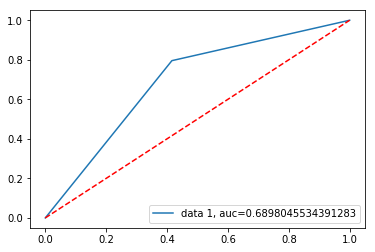

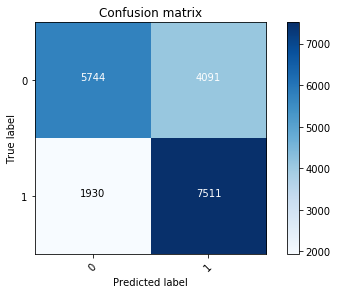



Accuracy: 68.76%


              precision    recall  f1-score   support

         0.0       0.75      0.58      0.66      9835
         1.0       0.65      0.80      0.71      9441

   micro avg       0.69      0.69      0.69     19276
   macro avg       0.70      0.69      0.68     19276
weighted avg       0.70      0.69      0.68     19276


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 60.0 %

(58701, 306)
(28913, 306)
train.shape (58701, 306)

Auto encoder Training

Train on 58701 samples, validate on 28913 samples
Epoch 1/20
 - 110s - loss: 0.0018 - val_loss: 0.0011
Epoch 2/20
 - 102s - loss: 8.7968e-04 - val_loss: 7.5506e-04
Epoch 3/20
 - 92s - loss: 7.6408e-04 - val_loss: 9.3091e-04
Epoch 4/20
 - 91s - loss: 7.3639e-04 - val_loss: 7.4138e-04
Epoch 5/20
 - 91s - loss:

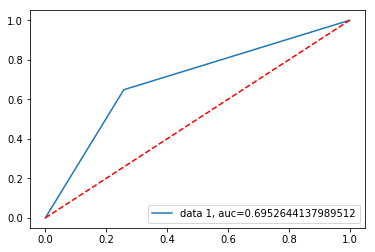

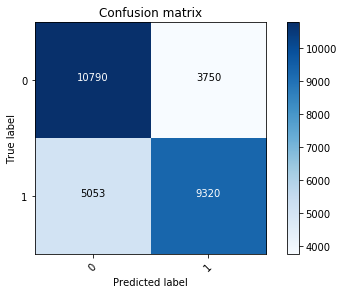



Accuracy: 69.55%


              precision    recall  f1-score   support

         0.0       0.68      0.74      0.71     14540
         1.0       0.71      0.65      0.68     14373

   micro avg       0.70      0.70      0.70     28913
   macro avg       0.70      0.70      0.69     28913
weighted avg       0.70      0.70      0.69     28913


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 80.0 %

(78268, 306)
(38551, 306)
train.shape (78268, 306)

Auto encoder Training

Train on 78268 samples, validate on 38551 samples
Epoch 1/20
 - 130s - loss: 0.0018 - val_loss: 8.8642e-04
Epoch 2/20
 - 124s - loss: 9.1332e-04 - val_loss: 8.0079e-04
Epoch 3/20
 - 125s - loss: 8.0668e-04 - val_loss: 7.5923e-04
Epoch 4/20
 - 129s - loss: 7.2427e-04 - val_loss: 6.1377e-04
Epoch 5/20
 - 134s 

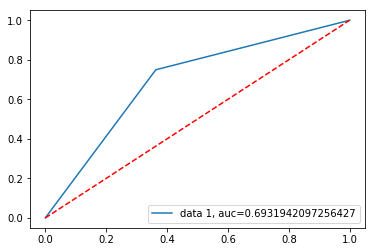

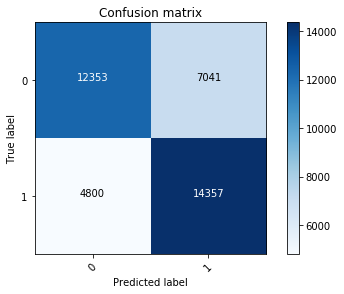



Accuracy: 69.28%


              precision    recall  f1-score   support

         0.0       0.72      0.64      0.68     19394
         1.0       0.67      0.75      0.71     19157

   micro avg       0.69      0.69      0.69     38551
   macro avg       0.70      0.69      0.69     38551
weighted avg       0.70      0.69      0.69     38551


*************************************************************************************************************************

*************************************************************************************************************************

SAMPLE SIZE- 100.0 %

(97836, 306)
(48188, 306)
train.shape (97836, 306)

Auto encoder Training

Train on 97836 samples, validate on 48188 samples
Epoch 1/20
 - 162s - loss: 0.0016 - val_loss: 9.1881e-04
Epoch 2/20
 - 158s - loss: 8.3071e-04 - val_loss: 7.5602e-04
Epoch 3/20
 - 157s - loss: 7.3676e-04 - val_loss: 6.6690e-04
Epoch 4/20
 - 158s - loss: 7.0808e-04 - val_loss: 7.3445e-04
Epoch 5/20
 - 155s

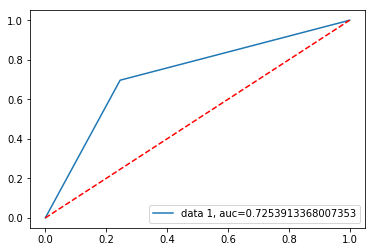

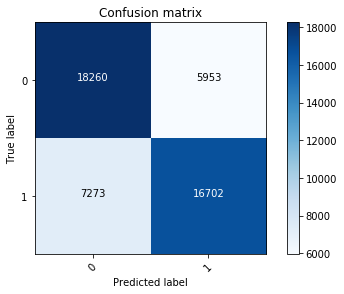



Accuracy: 72.55%


              precision    recall  f1-score   support

         0.0       0.72      0.75      0.73     24213
         1.0       0.74      0.70      0.72     23975

   micro avg       0.73      0.73      0.73     48188
   macro avg       0.73      0.73      0.73     48188
weighted avg       0.73      0.73      0.73     48188


*************************************************************************************************************************

*************************************************************************************************************************



In [27]:
encoder_acc_df = pd.DataFrame()
stacked_log_df = pd.DataFrame()
Accuracy_df = pd.DataFrame()
ROC_values = pd.DataFrame()
samples = [0.2,0.4,0.6,0.8,1.0]
#samples = [0.2,0.4]

for i in samples:
     # if i < 0.6:
    #     bat= 64
     # else:
      bat= 4
      print('\x1b[1;36m'+"SAMPLE SIZE-", i*100, "%\n" +'\x1b[0m')
      df2 = new_df.sample(frac= i)

      x_train,x_test,y_train,y_test = traintest_split(df2)
      print("train.shape", x_train.shape)
      encoded_train_x,encoded_test_x, temp = autoencoder(x_train,x_test, 20, bat)
      temp['Sample Size'] = (str(i * 100) + "%")
      encoder_acc_df = encoder_acc_df.append(temp, ignore_index=False)
      
      history, stackedmodel, temp2 = stacked_model(encoded_train_x, y_train, 20, bat)
      temp2['Sample Size'] = (str(i * 100) + "%")
      stacked_log_df = stacked_log_df.append(temp2, ignore_index=False)
      pred_prob, pred = predict(encoded_test_x, stackedmodel)
      
      
      
      temp3,roc_model = ROC_plot(pred_prob, pred,y_test)
      temp3['Sample Size'] = (str(i * 100) + "%")
      Accuracy_df = Accuracy_df.append(temp3, ignore_index=False)
      roc_model['Sample Size'] = (str(i * 100) + "%")
      ROC_values = ROC_values.append(roc_model)
      
      del history
      del stackedmodel
      del df2
      del x_train,x_test,y_train,y_test
      del pred_prob, pred
      del roc_model
      print( "\n*************************************************************************************************************************\n")
      print( "*************************************************************************************************************************\n")

In [33]:
Accuracy_df[['Sample Size', 'Accuracy','AUC','F1 Score','Recall','Precision']]

,Sample Size,Accuracy,AUC,F1 Score,Recall,Precision
0,20.0,0.69,0.69,0.69,0.69,0.69
0,40.0,0.69,0.69,0.68,0.69,0.70
0,60.0,0.70,0.70,0.69,0.70,0.70
0,80.0,0.69,0.69,0.69,0.69,0.70
0,100.0,0.73,0.73,0.73,0.73,0.73


,Accuracy,AUC,F1 Score,Recall,Precision,Sample Size
0,0.69,0.69,0.69,0.69,0.69,20.0
0,0.69,0.69,0.68,0.69,0.70,40.0
0,0.70,0.70,0.69,0.70,0.70,60.0
0,0.69,0.69,0.69,0.69,0.70,80.0
0,0.73,0.73,0.73,0.73,0.73,100.0


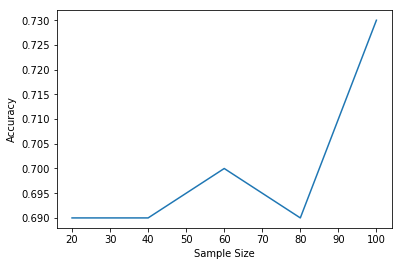

In [29]:
import re
Accuracy_df['Sample Size'] = Accuracy_df['Sample Size'].map(lambda x: re.sub(r'\W+', '', x))
Accuracy_df['Sample Size']  = Accuracy_df['Sample Size'].astype(int)
Accuracy_df['Sample Size'] = Accuracy_df['Sample Size'] / 10 

#Accuracy_df.sort_values(by= ['Sample Size'], inplace = True)
#Accuracy_df = Accuracy_df.reset_index()

g =sns.lineplot(x=Accuracy_df["Sample Size"].sort_values(), y="Accuracy",
                 
                sizes=(.25, 2.5), data=Accuracy_df)
g
Accuracy_df

In [30]:
ROC_values.columns = ['fpr','tpr','Sample']
ROC_values

,fpr,tpr,Sample
0,0.000000,0.000000,20.0%
1,0.351757,0.730874,20.0%
2,1.000000,1.000000,20.0%
0,0.000000,0.000000,40.0%
1,0.415963,0.795573,40.0%
2,1.000000,1.000000,40.0%
0,0.000000,0.000000,60.0%
1,0.257909,0.648438,60.0%
2,1.000000,1.000000,60.0%
0,0.000000,0.000000,80.0%


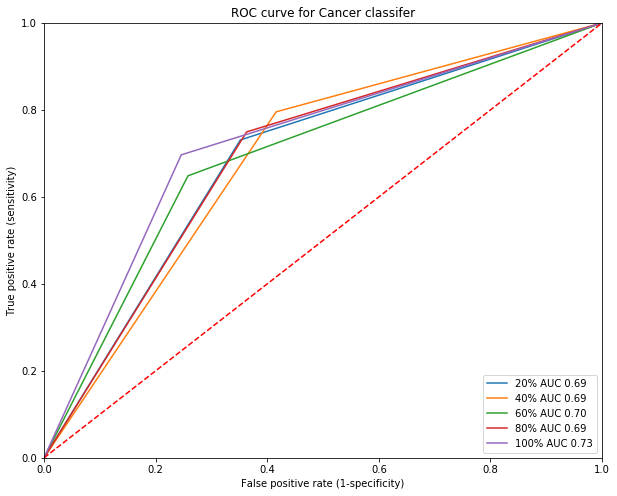

In [32]:
plt.figure(figsize=(10,8))
plt.plot(ROC_values['fpr'][0:3],ROC_values['tpr'][0:3],label='20% AUC 0.69')

plt.plot(ROC_values['fpr'][3:6],ROC_values['tpr'][3:6],label='40% AUC 0.69')
plt.plot(ROC_values['fpr'][6:9],ROC_values['tpr'][6:9],label='60% AUC 0.70')
plt.plot(ROC_values['fpr'][9:12],ROC_values['tpr'][9:12],label='80% AUC 0.69')

plt.plot(ROC_values['fpr'][12:15],ROC_values['tpr'][12:15],label='100% AUC 0.73')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

In [0]:
encoder_acc_df.to_csv('log_encoder_acc_adult_df_3.csv')
stacked_log_df.to_csv('log_stacked_log_adultdf_3.csv')
Accuracy_df.to_csv('log_accuracy_adult3.csv')
#temp3['Accuracy'] = pd.Series(round(metrics.accuracy_score(y_test, y_test),2))